In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from colorama import Fore
from colorama import Style

infoloc = "C:\\Users\\Saeed Mohajeryami\\Dropbox\\DOE project\\Reports_Slides_Codes\\du-project\\PI Point List_v13.5.xlsm"
status = pd.read_excel(infoloc,sheet_name="PI Status (feedback)")
measurement = pd.read_excel(infoloc, sheet_name='PI Measurement')

Fileloc = "C:\\Users\\Saeed Mohajeryami\\Dropbox\\DOE project\\tests\\9.1 LR-2.csv"
testdata = pd.read_csv(Fileloc)

    
systemcondition = []
for val1 in np.arange(801, 1151):
    if (list(status['Description'][status['HR Number'] == val1])[0] == 'RESERVED'):
        pass
    else:
        cond_list = []
        D = list(testdata[str(val1)][1:])
        lens = len(D)
        cond_list.append(val1)
        cond_list.append(D[0])
        for val2 in np.arange(0, lens - 1):
            if (int(D[val2 + 1]) - int(D[val2]) != 0):
                time = val2 + 1
                cond_list.append(time)
        if (len(cond_list) == 2):
            cond_list.append('nan')
        cond_list.append(D[lens - 1])
        systemcondition.append(cond_list)
        


# for val in np.arange(0, len(systemcondition)):
#     if (systemcondition[val][2] != 'nan'):
#         print('HR Number ' + str(systemcondition[val][0]) + ' changed : ' +
#               list(status['Description'][status['HR Number'] == systemcondition[val][0]])[0])
#         changecount = len(systemcondition[val]) - 3
#         dstatus = ['open', 'close']
#         if (systemcondition[val][1] == '0'):
#             for val3 in np.arange(1, changecount + 1):
#                 print(dstatus[val3 % 2] + ' at t= ' + str(systemcondition[val][1 + val3]) + ' [sec]')
#         else:
#             for val3 in np.arange(1, changecount + 1):
#                 print(dstatus[(val3 + 1) % 2] + ' at t= ' + str(systemcondition[val][1 + val3]) + ' [sec]')



In [2]:
int(systemcondition[0][0]) > 863

False

In [3]:
sysre = []
syssh = []
acsysop = []   # operands activated
desysop = []   # operands deactivated

for val in np.arange(0, len(systemcondition)):
    if (systemcondition[val][2] == 'nan'):
        pass
    elif (systemcondition[val][2] != 'nan' and int(systemcondition[val][0]) > 863):
        changenum = len(systemcondition[val])-3
        for val2 in np.arange(0,changenum):
            if (systemcondition[val][1] == '0'):
                if (val2 % 2 == 0):
                    lr = [systemcondition[val][2+val2], int(list(status['HR Number'][status['HR Number'] == systemcondition[val][0]])[0]), list(status['Description'][status['HR Number'] == systemcondition[val][0]])[0]]
                    acsysop.append(lr)
                else:
                    ls = [systemcondition[val][2+val2], int(list(status['HR Number'][status['HR Number'] == systemcondition[val][0]])[0]), list(status['Description'][status['HR Number'] == systemcondition[val][0]])[0]]
                    desysop.append(ls)
            elif (systemcondition[val][1] == '1'):
                if (val2 % 2 == 0):
                    ls = [systemcondition[val][2+val2], int(list(status['HR Number'][status['HR Number'] == systemcondition[val][0]])[0]), list(status['Description'][status['HR Number'] == systemcondition[val][0]])[0]]
                    desysop.append(ls)
                else:
                    lr = [systemcondition[val][2+val2], int(list(status['HR Number'][status['HR Number'] == systemcondition[val][0]])[0]), list(status['Description'][status['HR Number'] == systemcondition[val][0]])[0]]
                    acsysop.append(lr)  
    else:
        changenum = len(systemcondition[val])-3
        for val2 in np.arange(0,changenum):
            if (systemcondition[val][1] == '0'):
                if (val2 % 2 == 0):
                    lr = [systemcondition[val][2+val2], int(list(status['HR Number'][status['HR Number'] == systemcondition[val][0]])[0]), list(status['Description'][status['HR Number'] == systemcondition[val][0]])[0]]
                    sysre.append(lr)
                else:
                    ls = [systemcondition[val][2+val2], int(list(status['HR Number'][status['HR Number'] == systemcondition[val][0]])[0]), list(status['Description'][status['HR Number'] == systemcondition[val][0]])[0]]
                    syssh.append(ls)
            elif (systemcondition[val][1] == '1'):
                if (val2 % 2 == 0):
                    ls = [systemcondition[val][2+val2], int(list(status['HR Number'][status['HR Number'] == systemcondition[val][0]])[0]), list(status['Description'][status['HR Number'] == systemcondition[val][0]])[0]]
                    syssh.append(ls)
                else:
                    lr = [systemcondition[val][2+val2], int(list(status['HR Number'][status['HR Number'] == systemcondition[val][0]])[0]), list(status['Description'][status['HR Number'] == systemcondition[val][0]])[0]]
                    sysre.append(lr) 
                
######### Print the results ########
syssh = sorted(syssh)
sysre = sorted(sysre)
acsysop = sorted(acsysop)
desysop = sorted(desysop)
print('------------------ Activated/Close operands ---------------------\n')
for val in np.arange(0,len(acsysop)):
    print(acsysop[val])
print('\n------------------ Deactivated/Open operands ---------------------\n')
for val in np.arange(0,len(desysop)):
    print(desysop[val])
print('\n------------------ System Shutdown ---------------------\n')
for val in np.arange(0,len(syssh)):
    print(syssh[val])
print('\n------------------ System Restoration ---------------------\n')
for val in np.arange(0,len(sysre)):
    print(sysre[val])

------------------ Activated/Close operands ---------------------

[47, 922, 'Anti-islanding Protection Status']
[47, 923, 'Fast Load Shedding Status']
[55, 924, 'Loss of Voltage Status']
[224, 908, 'CB Disel Synch Check Status']
[241, 902, 'PCT 6 Synch Check Status']
[266, 879, 'Diesel Island Circuit Breaker Status']

------------------ Deactivated/Open operands ---------------------

[6, 922, 'Anti-islanding Protection Status']
[6, 923, 'Fast Load Shedding Status']
[6, 924, 'Loss of Voltage Status']
[108, 902, 'PCT 6 Synch Check Status']
[108, 908, 'CB Disel Synch Check Status']
[141, 879, 'Diesel Island Circuit Breaker Status']

------------------ System Shutdown ---------------------

[6, 826, 'PCT Switch 1 Status']
[15, 863, 'Battery2 Circuit Breaker Status']
[19, 862, 'Battery1 Circuit Breaker Status']
[27, 859, 'CHP Circuit Breaker Status']
[108, 828, 'Circuit Breaker F9 Status']
[113, 844, 'Load 213 Status']
[113, 846, 'Load 216 Status']
[113, 847, 'Load 271 Status']
[113, 848,

In [4]:
int(list(status['HR Number'][status['HR Number'] == systemcondition[val][0]])[0])

820

In [5]:
changenum

2

In [6]:
list(status['Description'][status['HR Number'] == systemcondition[val][0]])[0]

'PCL Switch 4 Status'

In [7]:
int(list(self.status['HR Number'][self.status['HR Number'] == self.statuschanges[val][0]])[0])

NameError: name 'self' is not defined

Text(0,0.5,'Frequency (Hz)')

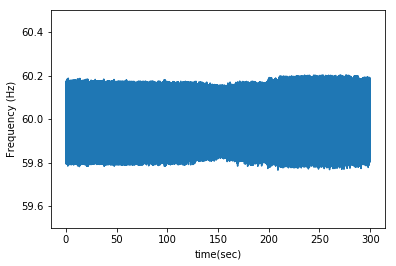

In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

% matplotlib inline

Fileloc = "C:\\Users\\Saeed Mohajeryami\\Dropbox\\DOE project\\tests\\PQ tests - PMU data\\PQ-1\\PQ-1-PMU_B102.csv"

testdata = pd.read_csv(Fileloc)

frequency = pd.DataFrame()
frequency['freq'] = testdata.iloc[:,26]
time = pd.DataFrame(np.arange(0, len(frequency)))
time = time.apply(lambda x: x / 60)
fig, axes = plt.subplots(nrows=1, ncols=1)  ## create a subplot
# st = fig.suptitle("F_11 Breaker Voltage", fontsize="x-large")

## plot  frequency
axes.plot(time, frequency)
axes.set_ylim([59.5, 60.5])
axes.set_xlabel('time(sec)')
axes.set_ylabel('Frequency (Hz)')


# Vol = pd.DataFrame()
# Vol[['VAmag', 'VAang', 'VBmag', 'VBang', 'VCmag', 'VCang']] = testdata.iloc[:, 2:8]

# Volseq = pd.DataFrame()
# Volseq[['V1mag', 'V1ang', 'V0mag', 'V0ang']] = testdata.iloc[:, 14:18]  ## positive and zero sequence
# Volseq[['V2mag', 'V2ang']] = testdata.iloc[:, 22:24]   # negative sequence
# time = pd.DataFrame(np.arange(0, len(Volseq)))
# time = time.apply(lambda x: x / 60)
        
        
# Cur = pd.DataFrame()
# Cur[['IAmag', 'IAang', 'IBmag', 'IBang', 'ICmag', 'ICang']] = testdata.iloc[:, 8:14]

# IB102 = testdata.iloc[:, 8:14]
# VB102SQ = testdata.iloc[:, 14:18]
# IB102SQ = testdata.iloc[:, 18:22]
# VB102SQ[['PMU_B102:PHASOR CH 11:V2:Magnitude', 'PMU_B102:PHASOR CH 11:V2:Angle']] = testdata.iloc[:, 22:24]
# IB102SQ[['PMU_B102:PHASOR CH 12:I2:Magnitude', 'PMU_B102:PHASOR CH 12:I2:Angle']] = testdata.iloc[:, 24:26]


# time = pd.DataFrame(np.arange(0, len(Cur)))
# time = time.apply(lambda x: x / 60)

# fig, axes = plt.subplots(nrows=2, ncols=3)  ## create a subplot
# # st = fig.suptitle("F_11 Breaker Voltage", fontsize="x-large")

# ## plot  phase A current magnitude (Amp)
# axes[0, 0].plot(time, Cur.iloc[:, 0])
# axes[0, 0].set_ylim([0, 1.1*max(Cur.iloc[:, 0])])
# axes[0, 0].set_xlabel('time(sec)')
# axes[0, 0].set_ylabel('Phase A Current Magnitude (A)')

# ## plot current phase A angle 
# axes[1, 0].plot(time, Cur.iloc[:, 1])
# if (max(Cur.iloc[:, 1]) > 0 and min(Cur.iloc[:, 1]) > 0):
#     axes[1, 0].set_ylim([0.95 * min(Cur.iloc[:, 1]), 1.05 * max(Cur.iloc[:, 1])])
# elif (max(Cur.iloc[:, 1]) > 0 and min(Cur.iloc[:, 1]) < 0):
#     axes[1, 0].set_ylim([1.05 * min(Cur.iloc[:, 1]), 1.05 * max(Cur.iloc[:, 1])])
# elif (max(Cur.iloc[:, 1]) < 0):
#     axes[1, 0].set_ylim([1.05 * min(Cur.iloc[:, 1]), 0.95 * max(Cur.iloc[:, 1])])
# axes[1, 0].set_xlabel('time(sec)')
# axes[1, 0].set_ylabel('Phase A Current Angle (degree)')

# ## plot phase B current magnitude (per unit)
# axes[0, 1].plot(time, Cur.iloc[:, 2])
# axes[0, 1].set_ylim([0, 1.1*max(Cur.iloc[:, 2])])
# axes[0, 1].set_xlabel('time(sec)')
# axes[0, 1].set_ylabel('Phase B Current Magnitude (p.u.)')

# ## plot phase B current angle (Amps)
# axes[1, 1].plot(time, Cur.iloc[:, 3])
# if (max(Cur.iloc[:, 3]) > 0 and min(Cur.iloc[:, 3]) > 0):
#     axes[1, 1].set_ylim([0.95 * min(Cur.iloc[:, 3]), 1.05 * max(Cur.iloc[:, 3])])
# elif (max(Cur.iloc[:, 3]) > 0 and min(Cur.iloc[:, 3]) < 0):
#     axes[1, 1].set_ylim([1.05 * min(Cur.iloc[:, 3]), 1.05 * max(Cur.iloc[:, 3])])
# elif (max(Cur.iloc[:, 3]) < 0):
#     axes[1, 1].set_ylim([1.05 * min(Cur.iloc[:, 3]), 0.95 * max(Cur.iloc[:, 3])])
# axes[1, 1].set_xlabel('time(sec)')
# axes[1, 1].set_ylabel('Phase B Current Angle (degree)')

# ## plot voltage phase C magnitude (per unit)
# axes[0, 2].plot(time, Cur.iloc[:, 4])
# axes[0, 2].set_ylim([0, 1.1*max(Cur.iloc[:, 4])])
# axes[0, 2].set_xlabel('time(sec)')
# axes[0, 2].set_ylabel('Phase C Current Magnitude (p.u.)')

# ## plot voltage phase C angle 
# axes[1, 2].plot(time, Cur.iloc[:, 5])
# if (max(Cur.iloc[:, 5]) > 0 and min(Cur.iloc[:, 5]) > 0):
#     axes[1, 2].set_ylim([0.95 * min(Cur.iloc[:, 5]), 1.05 * max(Cur.iloc[:, 5])])
# elif (max(Cur.iloc[:, 5]) > 0 and min(Cur.iloc[:, 3]) < 0):
#     axes[1, 2].set_ylim([1.05 * min(Cur.iloc[:, 5]), 1.05 * max(Cur.iloc[:, 5])])
# elif (max(Cur.iloc[:, 5]) < 0):
#     axes[1, 2].set_ylim([1.05 * min(Cur.iloc[:, 5]), 0.95 * max(Cur.iloc[:, 5])])
# axes[1, 2].set_xlabel('time(sec)')
# axes[1, 2].set_ylabel('Phase C Current Angle (degree)')

# fig, axes = plt.subplots(nrows=1, ncols=2)  ## create a subplot
# # st = fig.suptitle("F_11 Breaker Voltage", fontsize="x-large")

# ## plot all angles in one plot 
# axes[0].plot(time, Cur.iloc[:, 1])
# axes[0].plot(time, Cur.iloc[:, 3])
# axes[0].plot(time, Cur.iloc[:, 5])
# axes[0].set_xlabel('time(sec)')
# axes[0].set_ylabel('3-phase Current Angles (degree)')

# ## plot all magnitudes in one plot 
# axes[1].plot(time, Cur.iloc[:, 0])
# axes[1].plot(time, Cur.iloc[:, 2])
# axes[1].plot(time, Cur.iloc[:, 4])
# axes[1].set_ylim([0, 1.1*max([max(Cur.iloc[:, 0]),max(Cur.iloc[:, 2]),max(Cur.iloc[:, 4])])])
# axes[1].set_xlabel('time(sec)')
# axes[1].set_ylabel('3-phase Current Magnitudes (A)')

In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

% matplotlib inline

Fileloc = "C:\\Users\\Saeed Mohajeryami\\Dropbox\\DOE project\\tests\\PQ tests - PMU data\\PQ-1\\PQ-1-PMU_B102.csv"

testdata = pd.read_csv(Fileloc)

In [44]:
frequency.head()

,freq
0,59.9703
1,59.8102
2,60.0437
3,60.1696
4,60.0189


In [214]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

%matplotlib inline

ecdrnum = '1'
path = "C:\\Users\\Saeed Mohajeryami\\Dropbox\\DOE project\\tests\\ECDR\\ECDR\\ECDR"
Inputloc = path + "\\ECDR-" + ecdrnum + "-Input.xlsx"
Resultloc = path + "\\ECDR-" + ecdrnum + "-Result.xlsx"
businput = pd.read_excel(Inputloc, sheet_name='Bus')
windinput = pd.read_excel(Inputloc, sheet_name='Wind Unit')
loadinput = pd.read_excel(Inputloc, sheet_name='Spot Load')
elecpriceinput = pd.read_excel(Inputloc, sheet_name='Electricity Price')
fossildispatchresult = pd.read_excel(Resultloc, sheet_name='Fossil Dispatch')
chpthermalgenerationresult = pd.read_excel(Resultloc, sheet_name='CHP Thermal Generation')
griddispatchresult = pd.read_excel(Resultloc, sheet_name='Grid Dispatch')
batterydispatchresult = pd.read_excel(Resultloc, sheet_name='Battery Dispatch')
powerflowresult = pd.read_excel(Resultloc, sheet_name='Power Flow Solution')
buspowerinjectionresult = pd.read_excel(Resultloc, sheet_name='Bus Power Injection and Voltage')
loadafterdrresult = pd.read_excel(Resultloc, sheet_name='Spot Load after DR')

### loads #####
loadinput['P'] =  loadinput[['PA','PB','PC']].sum(1)
loadinput['Q'] =  loadinput[['QA','QB','QC']].sum(1)
Busno = list(loadinput['BusNo'].unique())    ### list of unique buses
time = np.arange(1,25)

## subsystem 1 before
dailyloadP = []
dailyloadQ = []
for val in np.arange(1,25):
    dailyloadP.append(loadinput[loadinput['iHour']== val][loadinput[loadinput['iHour']== val]['BusNo'] < 200]['P'].sum())
    dailyloadQ.append(loadinput[loadinput['iHour']== val][loadinput[loadinput['iHour']== val]['BusNo'] < 200]['Q'].sum())

sub1befdailyP = dailyloadP
sub1befdailyQ = dailyloadQ

## subsystem 2 before
dailyloadP = []
dailyloadQ = []
for val in np.arange(1,25):
    dailyloadP.append(loadinput[loadinput['iHour']== val][loadinput[loadinput['iHour']== val]['BusNo'] > 200]['P'].sum())
    dailyloadQ.append(loadinput[loadinput['iHour']== val][loadinput[loadinput['iHour']== val]['BusNo'] > 200]['Q'].sum())

sub2befdailyP = dailyloadP
sub2befdailyQ = dailyloadQ

#### loads after DR #####
loadafterdrresult['P'] =  loadafterdrresult[['PA','PB','PC']].sum(1)
loadafterdrresult['Q'] =  loadafterdrresult[['QA','QB','QC']].sum(1)
Busno = list(loadafterdrresult['BusNo'].unique())    ### list of unique buses
time = np.arange(1,25)

## subsystem 1 after
dailyloadP = []
dailyloadQ = []
for val in np.arange(1,25):
    dailyloadP.append(loadafterdrresult[loadafterdrresult['iHour']== val][loadafterdrresult[loadafterdrresult['iHour']== val]['BusNo'] < 200]['P'].sum())
    dailyloadQ.append(loadafterdrresult[loadafterdrresult['iHour']== val][loadafterdrresult[loadafterdrresult['iHour']== val]['BusNo'] < 200]['Q'].sum())

sub1aftdailyP = dailyloadP
sub1aftdailyQ = dailyloadQ

## subsystem 2 after
dailyloadP = []
dailyloadQ = []
for val in np.arange(1,25):
    dailyloadP.append(loadafterdrresult[loadafterdrresult['iHour']== val][loadafterdrresult[loadafterdrresult['iHour']== val]['BusNo'] > 200]['P'].sum())
    dailyloadQ.append(loadafterdrresult[loadafterdrresult['iHour']== val][loadafterdrresult[loadafterdrresult['iHour']== val]['BusNo'] > 200]['Q'].sum())

sub2aftdailyP = dailyloadP
sub2aftdailyQ = dailyloadQ

# dailyload = [sub1befdailyP,sub1befdailyQ,sub2befdailyP,sub2befdailyQ,sub1aftdailyP,sub1aftdailyQ,sub2aftdailyP,sub2aftdailyQ]
## PLOT LOADS BEFORE AND AFTER DR
# fig, axes = plt.subplots(nrows=2, ncols=2)  ## create a subplot

## plot daily load of subsystem 1 (kW)
# axes[0,0].plot(time, sub1befdailyP, 'r--', time, sub1aftdailyP, 'g' )        
# axes[0,0].set_xticks([1,4,8,12,16,20,24])
# axes[0,0].set_xticklabels(['1','4','8','12','16','20','24'])
# if (max([max(sub1befdailyP),max(sub1aftdailyP)]) > 0 and min([min(sub1befdailyP),min(sub1aftdailyP)]) > 0):
#     axes[0,0].set_ylim([0, 1.1*max([max(sub1befdailyP),max(sub1aftdailyP)])])
# elif (max([max(sub1befdailyP),max(sub1aftdailyP)]) > 0 and min([min(sub1befdailyP),min(sub1aftdailyP)]) < 0):
#     axes[0,0].set_ylim([1.1*min([min(sub1befdailyP),min(sub1aftdailyP)]), 1.1*max([max(sub1befdailyP),max(sub1aftdailyP)])])
# elif (max([max(sub1befdailyP),max(sub1aftdailyP)]) < 0):
#     axes[0,0].set_ylim([1.1*min([min(sub1befdailyP),min(sub1aftdailyP)]), 0])
# axes[0,0].set_xlabel('time(hour)')
# axes[0,0].set_ylabel('Subsystem 1 load \nactive power (kW)')

## plot daily load of subsystem 1 (kVAr)
# axes[1,0].plot(time, sub1befdailyQ, 'r--', time, sub1aftdailyQ, 'g' )  
# axes[1,0].set_xticks([1,4,8,12,16,20,24])
# axes[1,0].set_xticklabels(['1','4','8','12','16','20','24'])
# if (max([max(sub1befdailyQ),max(sub1aftdailyQ)]) > 0 and min([min(sub1befdailyQ),min(sub1aftdailyQ)]) > 0):
#     axes[1,0].set_ylim([0, 1.1*max([max(sub1befdailyQ),max(sub1aftdailyQ)])])
# elif (max([max(sub1befdailyQ),max(sub1aftdailyQ)]) > 0 and min([min(sub1befdailyQ),min(sub1aftdailyQ)]) < 0):
#     axes[1,0].set_ylim([1.1*min([min(sub1befdailyQ),min(sub1aftdailyQ)]), 1.1*max([max(sub1befdailyQ),max(sub1aftdailyQ)])])
# elif (max([max(sub1befdailyQ),max(sub1aftdailyQ)]) < 0):
#     axes[1,0].set_ylim([1.1*min([min(sub1befdailyQ),min(sub1aftdailyQ)]), 0])
# axes[1,0].set_xlabel('time(hour)')
# axes[1,0].set_ylabel('Subsystem 1 load \nreactive power (kVAr)')

# plot daily load of subsystem 2 (kW)
# axes[0,1].plot(time, sub2befdailyP, 'r--', time, sub2aftdailyP, 'g' )        
# axes[0,1].set_xticks([1,4,8,12,16,20,24])
# axes[0,1].set_xticklabels(['1','4','8','12','16','20','24'])
# if (max([max(sub2befdailyP),max(sub2aftdailyP)]) > 0 and min([min(sub2befdailyP),min(sub2aftdailyP)]) > 0):
#     axes[0,1].set_ylim([0, 1.1*max([max(sub2befdailyP),max(sub2aftdailyP)])])
# elif (max([max(sub2befdailyP),max(sub2aftdailyP)]) > 0 and min([min(sub2befdailyP),min(sub2aftdailyP)]) < 0):
#     axes[0,1].set_ylim([1.1*min([min(sub2befdailyP),min(sub2aftdailyP)]), 1.1*max([max(sub2befdailyP),max(sub2aftdailyP)])])
# elif (max([max(sub2befdailyP),max(sub2aftdailyP)]) < 0):
#     axes[0,1].set_ylim([1.1*min([min(sub2befdailyP),min(sub2aftdailyP)]), 0])
# axes[0,1].set_xlabel('time(hour)')
# axes[0,1].set_ylabel('Subsystem 2 load \nactive power (kW)')

## plot daily load of subsystem 2 (kVAr)
# axes[1,1].plot(time, sub2befdailyQ, 'r--', time, sub2aftdailyQ, 'g' )  
# axes[1,1].set_xticks([1,4,8,12,16,20,24])
# axes[1,1].set_xticklabels(['1','4','8','12','16','20','24'])
# if (max([max(sub2befdailyQ),max(sub2aftdailyQ)]) > 0 and min([min(sub2befdailyQ),min(sub2aftdailyQ)]) > 0):
#     axes[1,1].set_ylim([0, 1.1*max([max(sub2befdailyQ),max(sub2aftdailyQ)])])
# elif (max([max(sub2befdailyQ),max(sub2aftdailyQ)]) > 0 and min([min(sub2befdailyQ),min(sub2aftdailyQ)]) < 0):
#     axes[1,1].set_ylim([1.1*min([min(sub2befdailyQ),min(sub2aftdailyQ)]), 1.1*max([max(sub2befdailyQ),max(sub2aftdailyQ)])])
# elif (max([max(sub2befdailyQ),max(sub2aftdailyQ)]) < 0):
#     axes[1,1].set_ylim([1.1*min([min(sub2befdailyQ),min(sub2aftdailyQ)]), 0])
# axes[1,1].set_xlabel('time(hour)')
# axes[1,1].set_ylabel('Subsystem 2 load \nreactive power (kVAr)')
# 
# plt.tight_layout()

In [220]:
windinput.empty

True

C:\Pythoni\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Pythoni\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Pythoni\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Pythoni\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


Text(0,0.5,'Subsystem 2 Supply and Demand power (kVA)')

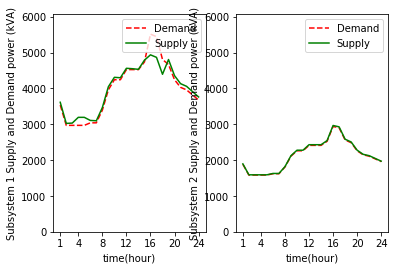

In [203]:
CHP = fossildispatchresult.iloc[0, 2:]
Diesel = fossildispatchresult.iloc[1, 2:]
battery1 = batterydispatchresult.iloc[0, 2:]
battery2 = batterydispatchresult.iloc[1, 2:]
Substation1 = griddispatchresult.iloc[0, 2:]
Substation2 = griddispatchresult.iloc[1, 2:]

Sub1Q = np.array(powerflowresult[powerflowresult['frombusno']==101]['q'])
Sub2Q = np.array(powerflowresult[powerflowresult['frombusno']==201]['q'])
newQ1 = []
newQ2 = []
for val in np.arange(0,24):
    newQ1.append(Sub1Q[3*val]+Sub1Q[3*val+1]+Sub1Q[3*val+2])
    newQ2.append(Sub2Q[3*val]+Sub2Q[3*val+1]+Sub2Q[3*val+2])
Sub1Q = newQ1
Sub2Q = newQ2

Substation1 = [np.sqrt(d1**2 + d2**2) for (d1, d2) in zip(Substation1, Sub1Q)]
Substation2 = [np.sqrt(d1**2 + d2**2) for (d1, d2) in zip(Substation2, Sub2Q)]

CHPth = chpthermalgenerationresult.iloc[0,1:]
Supply1 = [g1 + g3 + g4 + g5 + g7 for (g1, g2, g3, g4, g5, g6, g7) in zip(CHP, Diesel, battery1, battery2, Substation1, Substation2, CHPth)]
Supply2 = [g2 + g6 for (g1, g2, g3, g4, g5, g6, g7) in zip(CHP, Diesel, battery1, battery2, Substation1, Substation2, CHPth)]
Demand1 = [np.sqrt(d1**2 + d2**2) for (d1, d2, d3, d4) in zip(sub1aftdailyP, sub1aftdailyQ, sub2aftdailyP, sub2aftdailyQ)]
Demand2 = [np.sqrt(d3**2 + d4**2) for (d1, d2, d3, d4) in zip(sub1aftdailyP, sub1aftdailyQ, sub2aftdailyP, sub2aftdailyQ)]
time = np.arange(1,25)

# Demand1 = np.array(Demand1)
# Supply1 = np.array(Supply1)
# time = np.array(time)

fig, axes = plt.subplots(nrows=1, ncols=2)  ## create a subplot

axes[0].plot(time, Demand1, 'r--', label='Demand')  ### demand
plt.hold(True)
axes[0].plot(time, Supply1, 'g', label='Supply')  ### supply
axes[0].legend(loc="upper right")
# axes[0].plot(time, Demand1, 'r--', time, Supply1, 'g' )        
axes[0].set_xticks([1,4,8,12,16,20,24])
axes[0].set_xticklabels(['1','4','8','12','16','20','24'])
axes[0].set_ylim([0,1.1*max([max(Supply1),max(Demand1)])])
axes[0].set_xlabel('time(hour)')
axes[0].set_ylabel('Subsystem 1 Supply and Demand power (kVA)')

axes[1].plot(time, Demand2, 'r--', label='Demand')  ### demand
plt.hold(True)
axes[1].plot(time, Supply2, 'g', label='Supply')  ### supply
axes[1].legend(loc="upper right")
# axes[0].plot(time, Demand1, 'r--', time, Supply1, 'g' )        
axes[1].set_xticks([1,4,8,12,16,20,24])
axes[1].set_xticklabels(['1','4','8','12','16','20','24'])
axes[1].set_ylim([0,1.1*max([max(Supply1),max(Demand1)])])
axes[1].set_xlabel('time(hour)')
axes[1].set_ylabel('Subsystem 2 Supply and Demand power (kVA)')


In [193]:
# [x - y for (x,y) in zip(Demand1,Supply1)]
Sub1Q = np.array(powerflowresult[powerflowresult['frombusno']==101]['q'])
Sub2Q = np.array(powerflowresult[powerflowresult['frombusno']==201]['q'])
newQ1 = []
newQ2 = []
for val in np.arange(0,24):
    newQ1.append(Sub1Q[3*val]+Sub1Q[3*val+1]+Sub1Q[3*val+2])
    newQ2.append(Sub2Q[3*val]+Sub2Q[3*val+1]+Sub2Q[3*val+2])
Sub1Q = newQ1
Sub2Q = newQ2

[416.73,
 348.22999999999996,
 348.22999999999996,
 348.22999999999996,
 348.22999999999996,
 356.73,
 356.73,
 399.43999999999994,
 468.45000000000005,
 503.15,
 503.15,
 538.15,
 538.15,
 538.15,
 564.41,
 661.49,
 652.61,
 573.1700000000001,
 555.65,
 503.15,
 477.11,
 468.45000000000005,
 451.16999999999996,
 433.93999999999994]

In [32]:
DemandResponse = [L1 - L2 for (L1, L2) in zip(aftdailyP, befdailyP)]

for val in np.arange(1,25):
    if (DemandResponse[val-1] < 0):
        print(str(round(DemandResponse[val-1],2)) + ' kVA Load reduction at t=' + str(val) + ' h')
    elif (DemandResponse[val-1] > 0):
        print(str(round(DemandResponse[val-1],2)) + ' kVA Load increase at t=' + str(val) + ' h')

-677.19 kVA Load reduction at t=16 h
-1429.71 kVA Load reduction at t=17 h
-571.59 kVA Load reduction at t=18 h


In [29]:
x = round(677.198083478,3)
x

677.198

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

%matplotlib inline

ecdrnum = '2'
path = "C:\\Users\\Saeed Mohajeryami\\Dropbox\\DOE project\\tests\\ECDR\\ECDR\\ECDR"
Inputloc = path + "\\ECDR-" + ecdrnum + "-Input.xlsx"
Resultloc = path + "\\ECDR-" + ecdrnum + "-Result.xlsx"
businput = pd.read_excel(Inputloc, sheet_name='Bus')
loadinput = pd.read_excel(Inputloc, sheet_name='Spot Load')
elecpriceinput = pd.read_excel(Inputloc, sheet_name='Electricity Price')
fossildispatchresult = pd.read_excel(Resultloc, sheet_name='Fossil Dispatch')
griddispatchresult = pd.read_excel(Resultloc, sheet_name='Grid Dispatch')
batterydispatchresult = pd.read_excel(Resultloc, sheet_name='Battery Dispatch')
powerflowresult = pd.read_excel(Resultloc, sheet_name='Power Flow Solution')
buspowerinjectionresult = pd.read_excel(Resultloc, sheet_name='Bus Power Injection and Voltage')
loaddemandresponseresult = pd.read_excel(Resultloc, sheet_name='Load Demand Response')
loadafterdrresult = pd.read_excel(Resultloc, sheet_name='Spot Load after DR')



C:\Pythoni\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  del sys.path[0]
C:\Pythoni\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Pythoni\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


Text(0,0.5,'Substation power (kW)')

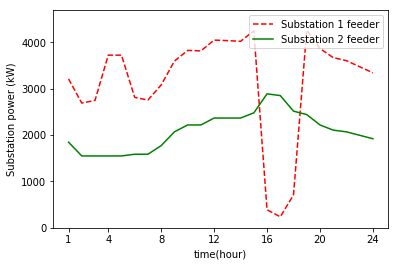

In [12]:
Substation1 = griddispatchresult.iloc[0,2:]
Substation2 = griddispatchresult.iloc[1,2:]
time = np.arange(1,25)

fig, axes = plt.subplots(nrows=1, ncols=1)  ## create a subplot

# ## plot substation power (kW)
axes.plot(time, Substation1, 'r--', label = 'Substation 1 feeder' )        ### sub 1
plt.hold(True)
axes.plot(time, Substation2, 'g', label = 'Substation 2 feeder' )       ### sub 2
axes.legend(loc="upper right")       
axes.set_xticks([1,4,8,12,16,20,24])
axes.set_xticklabels(['1','4','8','12','16','20','24'])
axes.set_ylim([0, 1.1*max([max(Substation1),max(Substation2)])])
axes.set_xlabel('time(hour)')
axes.set_ylabel('Substation power (kW)')


In [16]:
loaddemandresponseresult

,ihour,busno,DemandResponse
0,17,122,1429.700
1,16,105,677.190
2,18,232,571.586


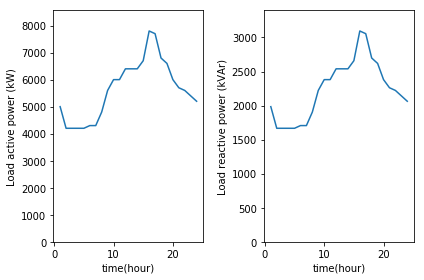

In [133]:
##### loads after DR #####
loadafterdrresult['P'] =  loadafterdrresult[['PA','PB','PC']].sum(1)
loadafterdrresult['Q'] =  loadafterdrresult[['QA','QB','QC']].sum(1)
Busno = list(loadafterdrresult['BusNo'].unique())    ### list of unique buses
time = np.arange(1,25)
dailyloadP = []
dailyloadQ = []
for val in np.arange(1,25):
    dailyloadP.append(loadinput[loadafterdrresult['iHour']==val]['P'].sum())
    dailyloadQ.append(loadinput[loadafterdrresult['iHour']==val]['Q'].sum())
aftdailyP = dailyloadP
aftdailyQ = dailyloadQ
fig, axes = plt.subplots(nrows=1, ncols=2)  ## create a subplot
## plot daily load (kW)
axes[0].plot(time, aftdailyP)
axes[0].set_ylim([0, 1.1*max(aftdailyP)])
axes[0].set_xlabel('time(hour)')
axes[0].set_ylabel('Load active power (kW)')

axes[1].plot(time, aftdailyQ)
axes[1].set_ylim([0, 1.1*max(aftdailyQ)])
axes[1].set_xlabel('time(hour)')
axes[1].set_ylabel('Load reactive power (kVAr)')

plt.tight_layout()

[104,
 105,
 106,
 107,
 109,
 110,
 114,
 120,
 122,
 127,
 129,
 205,
 207,
 213,
 215,
 216,
 217,
 218,
 222,
 223,
 224,
 225,
 227,
 228,
 232]

In [113]:
Busno = list(loadinput['BusNo'].unique())
time = np.arange(1,25)
dailyloadP = []
dailyloadQ = []
for val in np.arange(1,25):
    dailyloadP.append(loadinput[loadinput['iHour']==val]['P'].sum())
    dailyloadQ.append(loadinput[loadinput['iHour']==val]['Q'].sum())

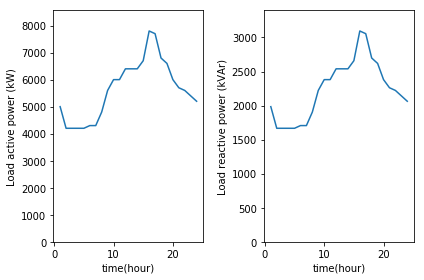

In [119]:

fig, axes = plt.subplots(nrows=1, ncols=2)  ## create a subplot
## plot daily load (kW)
axes[0].plot(time, dailyloadP)
axes[0].set_ylim([0, 1.1*max(dailyloadP)])
axes[0].set_xlabel('time(hour)')
axes[0].set_ylabel('Load active power (kW)')

axes[1].plot(time, dailyloadQ)
axes[1].set_ylim([0, 1.1*max(dailyloadQ)])
axes[1].set_xlabel('time(hour)')
axes[1].set_ylabel('Load reactive power (kVAr)')

plt.tight_layout()

In [71]:
loadinput.head()

,SpotLoadIndex,feeder,BusNo,SpotLoadName,PA,QA,PB,QB,PC,QC,iHour,status,ECDRStatus,P
0,1,1,104,Load104,86.82,57.88,86.82,57.88,86.82,57.88,1,1,False,260.46
1,1,1,104,Load104,72.93,48.62,72.93,48.62,72.93,48.62,2,1,False,218.79
2,1,1,104,Load104,72.93,48.62,72.93,48.62,72.93,48.62,3,1,False,218.79
3,1,1,104,Load104,72.93,48.62,72.93,48.62,72.93,48.62,4,1,False,218.79
4,1,1,104,Load104,72.93,48.62,72.93,48.62,72.93,48.62,5,1,False,218.79
